# Artificial Neural Network

### Importing the libraries

In [29]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [30]:
tf.__version__

'2.20.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [31]:
dataset = pd.read_csv('Churn_Modelling.csv')
# row number, customer ID, surname disregarded as it shouldn't affect the dependent variable
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [32]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [33]:
print(y)

[1 0 1 ... 1 1 0]


### Encoding categorical data

Label Encoding the "Gender" column

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(y) # all the rows but only column (gender)

In [35]:
print(X)

[[619 'France' 1 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 1 ... 1 0 113931.57]
 ...
 [709 'France' 1 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


One Hot Encoding the "Geography" column

In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough') # columns 1: Geography
X = np.array(ct.fit_transform(X))

In [37]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


### Splitting the dataset into the Training set and Test set

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling
Feature scalling is a very important step in Deep Learning.

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2 - Building the ANN

### Initializing the ANN

In [40]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [41]:
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

### Adding the second hidden layer

In [42]:
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

### Adding the output layer

sigmoid AF only for binary output variables. Otherwise use 'Softmax'

In [43]:
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN

For binary classification the loss function must be 'binary_crossentropy' for non-binary it must be 'categorical_crossentropy'

In [44]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [45]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5038 - loss: 0.7582  
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - accuracy: 0.9570 - loss: 0.3821
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - accuracy: 0.9999 - loss: 0.1079
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - accuracy: 0.9999 - loss: 0.0347
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - accuracy: 1.0000 - loss: 0.0124
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - accuracy: 1.0000 - loss: 0.0056
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - accuracy: 1.0000 - loss: 0.0031
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - accuracy: 1.0000 - loss: 0.0020
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - accuracy: 1.0000 - loss: 0.0013
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 9.6067e-04
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 7.1697e-04
Epoch 12/100
25

## Part 4 - Making the predictions and evaluating the model

### Predicting the result of a single observation

**Homework**

Use our ANN model to predict if the customer with the following informations will leave the bank: 

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

So, should we say goodbye to that customer?

**Solution**

In [46]:
ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) #2d array always expected here -> double []
# the model was trained on scaled variables, therefore we also need to scale the prediction variables via sc.transform

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


array([[1.]], dtype=float32)

Therefore, our ANN model predicts that this customer stays in the bank!

**Important note 1:** Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array.

**Important note 2:** Notice also that the "France" country was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the first row of the matrix of features X, "France" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, because the dummy variables are always created in the first columns.

### Predicting the Test set results

In [47]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5) # to transform the probabilities into binary values
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step
[[0 0]
 [1 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Making the Confusion Matrix

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1595    0]
 [   0  405]]


1.0

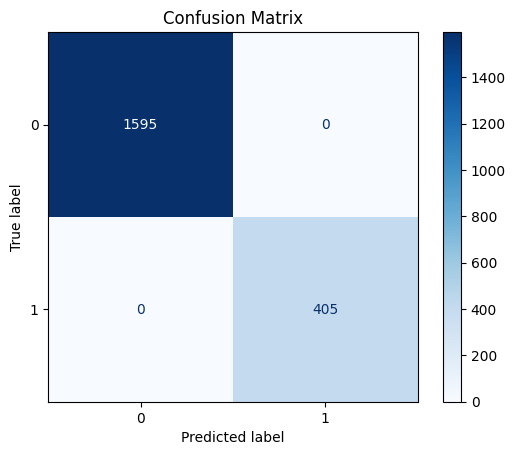

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1595
           1       1.00      1.00      1.00       405

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [49]:
#Alternative: My Own
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, normalize=None,  # or 'true'/'pred' for rates
    cmap='Blues', values_format='d'  # use '.2f' if normalized
)
plt.title('Confusion Matrix')
plt.show()
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))